# Import necessary libraries, load dataset and prepare data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.base import BaseEstimator, ClassifierMixin

data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame for EDA

In [20]:
cancer_df = pd.DataFrame(data=np.c_[X, y], columns=data.feature_names.tolist() + ['target'])

# Exploratory Data Analysis (EDA)
- Check for missing values
- Visualize the distribution of the target variable
- Boxplot for feature analysis
- Correlation heatmap


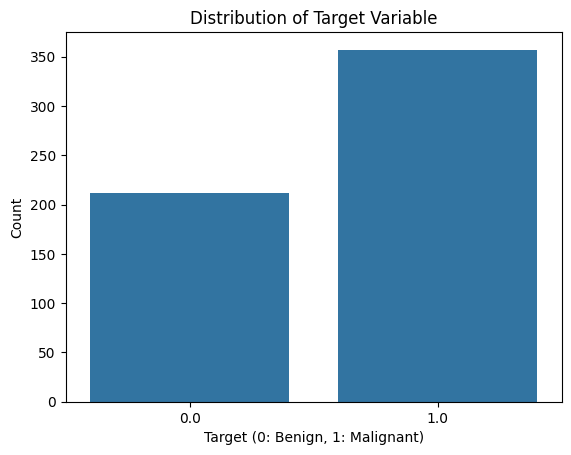

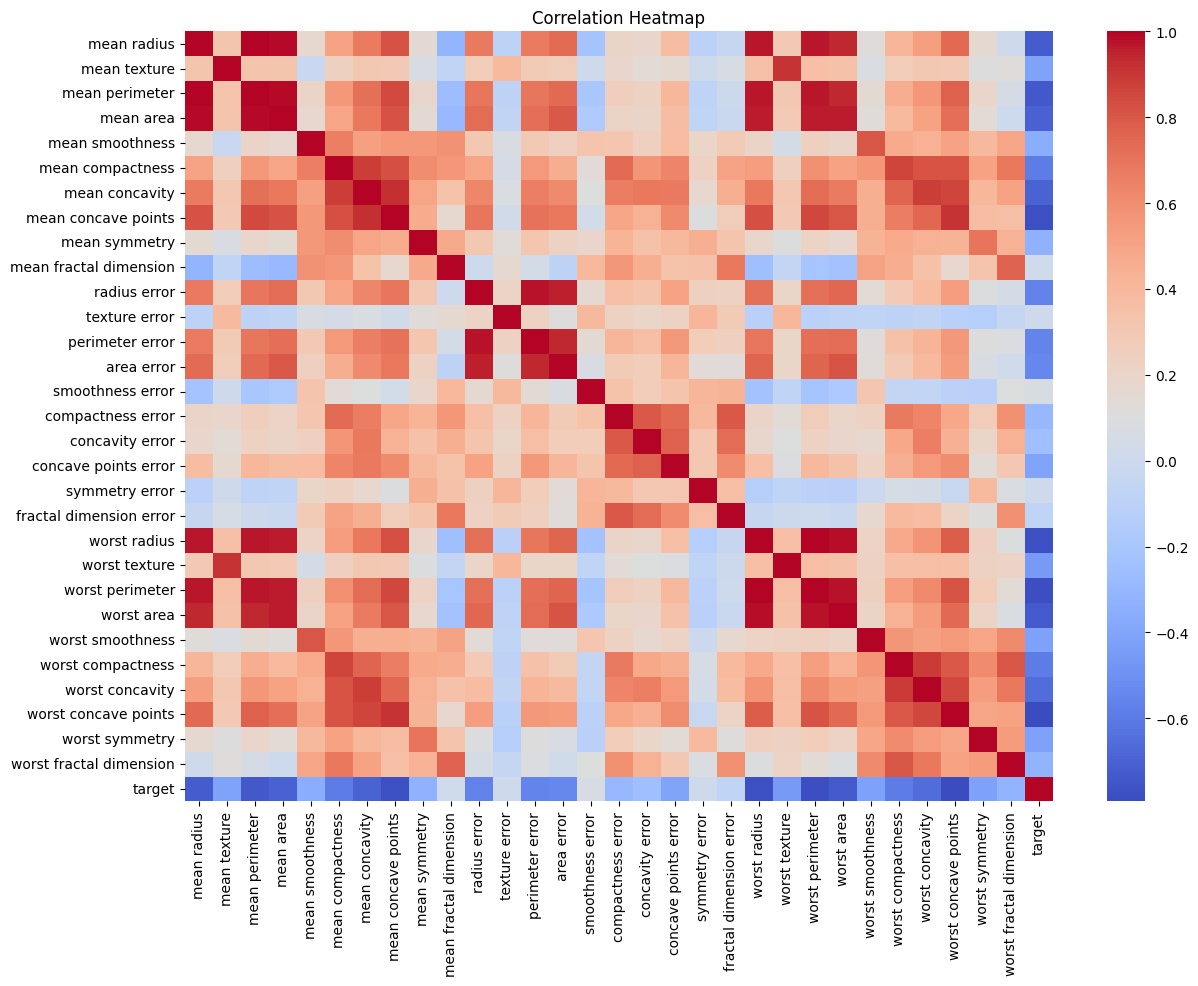

In [21]:
sns.countplot(x='target', data=cancer_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(14, 10))
sns.heatmap(cancer_df.corr(), fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing: Split the dataset into training and testing sets


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Classifier Implementation

In [32]:
def euclidean_distance(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.sqrt(np.sum((point1 - point2) ** 2))

class KNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k: int = 3):
        self.k = k
        self.X_train: np.ndarray = np.empty((0,))
        self.y_train: np.ndarray = np.empty((0,))

    def fit(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x: np.ndarray) -> int:
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def score(self, X_test: np.ndarray, y_test: np.ndarray) -> float:
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        return accuracy

    def get_params(self, deep=True):
        return {"k": self.k}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        
        return self

# Hyperparameter tuning using Grid Search


In [33]:
param_grid = {'k': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNN(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
accuracy_best_knn = best_knn.score(X_test, y_test)
print(f"Best KNN Accuracy: {accuracy_best_knn:.4f}")


Best KNN Accuracy: 0.9474


# Predictions and evaluation metrics

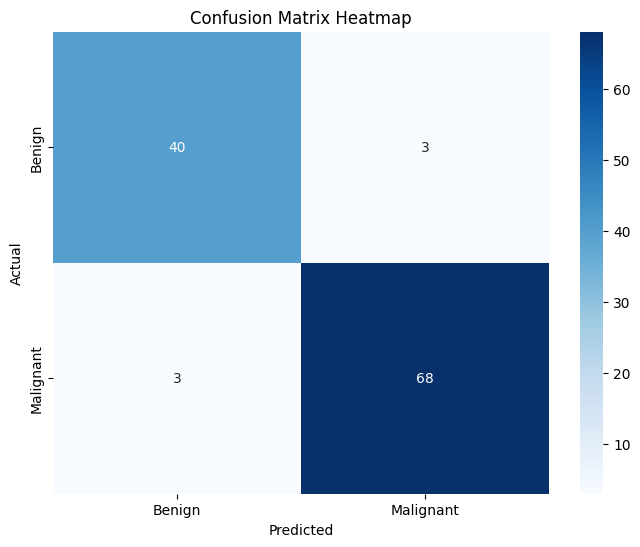


Classification Report for Best KNN:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [29]:
y_pred_best_knn = best_knn.predict(X_test)

cm_best_knn = confusion_matrix(y_test, y_pred_best_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_knn, annot=True, fmt="d", cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

print("\nClassification Report for Best KNN:")
print(classification_report(y_test, y_pred_best_knn))

# Comparative analysis
## Accuracy:
- My KNN model has achieved 95% accuracy, which is higher than the 92% of the scikit-learn model. 
## Precision:
- For class 0: My model showed 93%, while the scikit-learn model showed 92%.
- For Class 1: My model has reached 96%, while scikit-learn has reached 93%.
## Recall:
- For class 0: My model has 93% and the scikit-learn model has 88%.
- For Class 1: My model showed 96%, while scikit-learn showed 95%.
## F1 is a measure:
- For class 0: My model has an F1 measure of 93%, and the scikit-learn model has 90%.
- For Class 1: My model achieved an F1 measure of 96%, while scikit-learn achieved 94%.
## Confusion Matrix:
- My model made a mistake on 3 examples of class 1, predicting them as class 0, and on 3 examples of class 0, predicting them as class 1.
- The model from scikit-learn was wrong on 8 examples of class 1 and on 5 examples of class 0.
---
## Conclusions
My KNN implementation shows better results on all major metrics compared to the model from scikit-learn.
The superiority of my model in completeness and F1-measure for both classes is especially noticeable, which indicates more efficient class recognition.
This may indicate that my KNN implementation is better adapted to this task or uses more optimal parameters.
Thus, my KNN model shows excellent results and may be preferable for classification tasks on this dataset.